In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ___FRED___
------------

In [2]:
fred = pd.read_csv(r"./FRED/FRED3_Entire_Database_2021.csv", low_memory=False, header=0, skiprows=range(1, 10))
groot = pd.read_csv(r"./GRooTFullVersion.csv", low_memory=False, encoding="latin")
meta = pd.read_csv(r"./FRED/FRED3_Column_Definitions_2021.csv", index_col=0, usecols=("column_id", "name"))

In [4]:
meta.name = meta.name.str.lower().str.replace(' ', '_').str.replace('/', '_')
with pd.option_context("display.max_rows", None):
    # print(meta.name)
    pass

In [5]:
meta.name[meta.name.str.contains("photo")]

column_id
F00043       plant_photosynthetic_pathway
F01232                chamber_photoperiod
F01261       photosynthesis_per_leaf_area
F01262     n_photosynthesis_per_leaf_area
F01263    se_photosynthesis_per_leaf_area
Name: name, dtype: object

In [5]:
# F00043 - plant_photosynthetic_pathway

fred.loc[:, "F00043"].isna().mean() # :/

np.float64(0.34575974820772865)

In [6]:
# F00056 - Root order
fred.loc[:, "F00056"].isna().mean() # jeez!

np.float64(0.8715334848749782)

In [10]:
fred.loc[:, "F00043"].dropna().unique()

array(['C3', 'C4', 'C3/CAM', 'C3/C4', 'CAM', 'C4/CAM'], dtype=object)

In [9]:
# meta.name[meta.name.str.contains("root_cortex")]
# meta.name[meta.name.str.contains("plant_taxonomy")]
# meta.name[meta.name.str.contains("order")]

In [15]:
# F00043 - plant_photosynthetic_pathway
# F00056 - root_order
# F00679 - root_diameter
# F00727 - specific_root_length_(srl)
# F00104 - root_cortex_thickness
# F00125 - root_stele_root_cortex_ratio

data = fred.loc[:, ["F00043", "F00679", "F00727", "F00104", "F00125", "F00017", "F00018", "F00019", "F00056"]].dropna(
                        subset=["F00043", "F00056"] # photosynthetic pathway and root order are non negotiable!!
                          ) # .query("F00056==1") # only choose the finest roots

data.rename(mapper={"F00679": "root_diameter",
                    "F00727": "specific_root_length",
                    "F00104": "root_cortex_thickness",
                    "F00125": "root_stele_root_cortex_ratio",
                    "F00017": "plant_taxonomy_family_data_source", 
                    "F00018": "plant_taxonomy_genus_data_source",
                    "F00019": "plant_taxonomy_species_data_source",
                    "F00056": "root_order"},
            axis=1, inplace=True)

In [16]:
data.groupby("F00043").count()

,root_diameter,specific_root_length,root_cortex_thickness,root_stele_root_cortex_ratio,plant_taxonomy_family_data_source,plant_taxonomy_genus_data_source,plant_taxonomy_species_data_source,root_order
F00043,,,,,,,,
C3,3547,1891,255,49,931,6030,6028,6036
C3/C4,0,3,0,0,0,3,3,3
C3/CAM,1,3,0,0,0,4,4,4
C4,12,6,0,0,0,29,29,29
CAM,107,0,0,0,0,120,120,120


In [17]:
with pd.option_context("display.max_rows", None):
    print(
        data.loc[:, ["F00043", "plant_taxonomy_family_data_source", "plant_taxonomy_genus_data_source"]
          ].groupby(["F00043", "plant_taxonomy_family_data_source"]).count()
         )

                                          plant_taxonomy_genus_data_source
F00043 plant_taxonomy_family_data_source                                  
C3     Aceraceae                                                        24
       Actinidiaceae                                                     1
       Adiantaceae                                                       4
       Adoxaceae                                                         1
       Alangiaceae                                                       1
       Altingiacae                                                       3
       Altingiaceae                                                      1
       Amaranthaceae                                                     5
       Anacardiaceae                                                     2
       Apocynaceae                                                       1
       Aquifoliaceae                                                     3
       Araliaceae        

In [18]:
# the differences could be attributed to the lack of diversity in the data for C4 and CAM groups

In [19]:
np.unique(data.F00043, return_counts=True)

(array(['C3', 'C3/C4', 'C3/CAM', 'C4', 'CAM'], dtype=object),
 array([6036,    3,    4,   29,  120]))

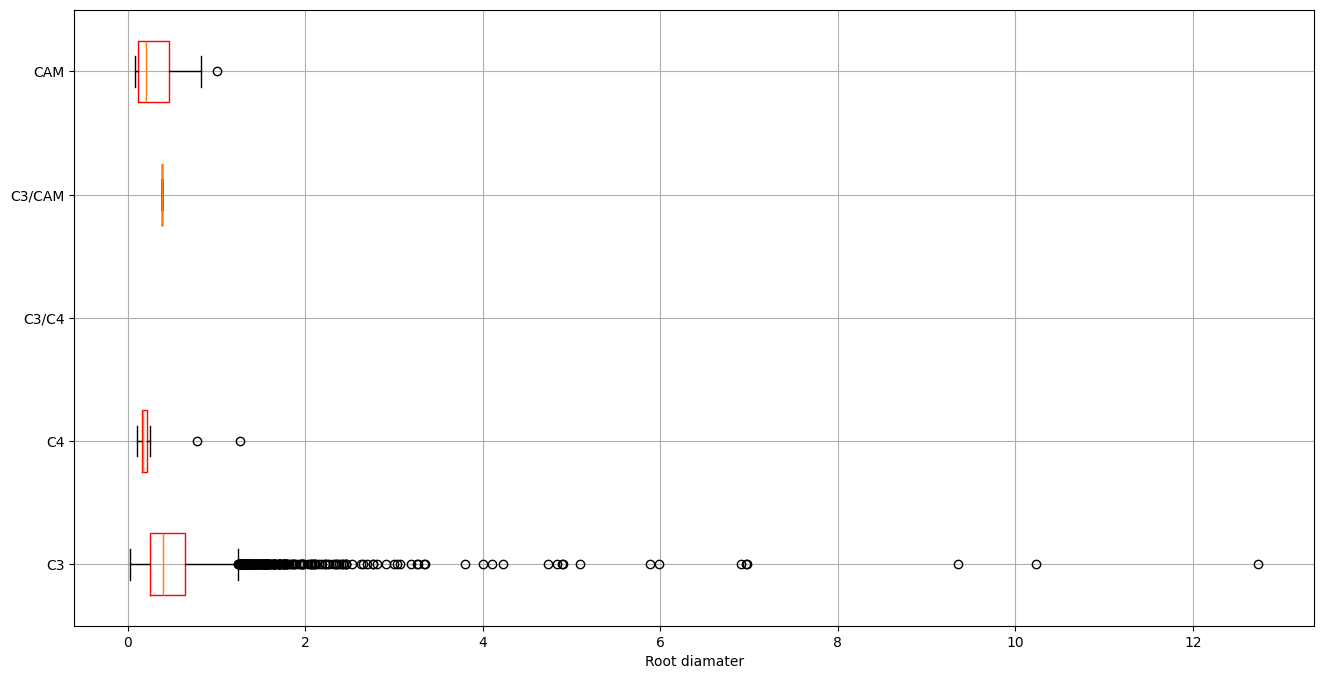

In [20]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 8)
axes.boxplot(x=[data.loc[np.logical_not(data.root_diameter.isna()) & (data.F00043 == pway), "root_diameter"] for pway \
                in data.F00043.unique()], orientation="horizontal", tick_labels=list(data.F00043.unique()), boxprops={"color":"red"})
axes.set_xlabel("Root diamater")
axes.grid()
plt.show()

In [49]:
data.loc[:, ["F00043", "root_cortex_thickness"]].dropna().F00043.unique() # that's disappointing

array(['C3'], dtype=object)

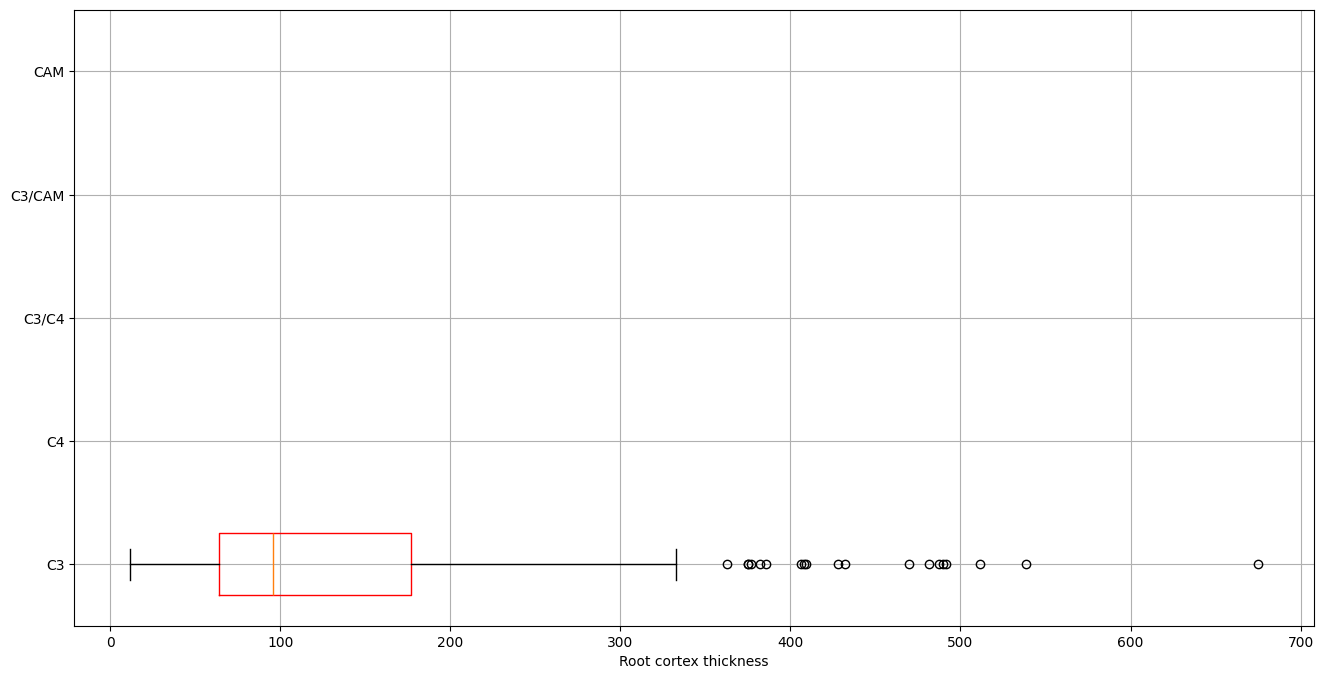

In [50]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 8)
axes.boxplot(x=[data.loc[np.logical_not(data.root_cortex_thickness.isna()) & (data.F00043 == pway), "root_cortex_thickness"] for pway \
                in data.F00043.unique()], orientation="horizontal", tick_labels=list(data.F00043.unique()), boxprops={"color":"red"})
axes.set_xlabel("Root cortex thickness")
axes.grid()
plt.show()

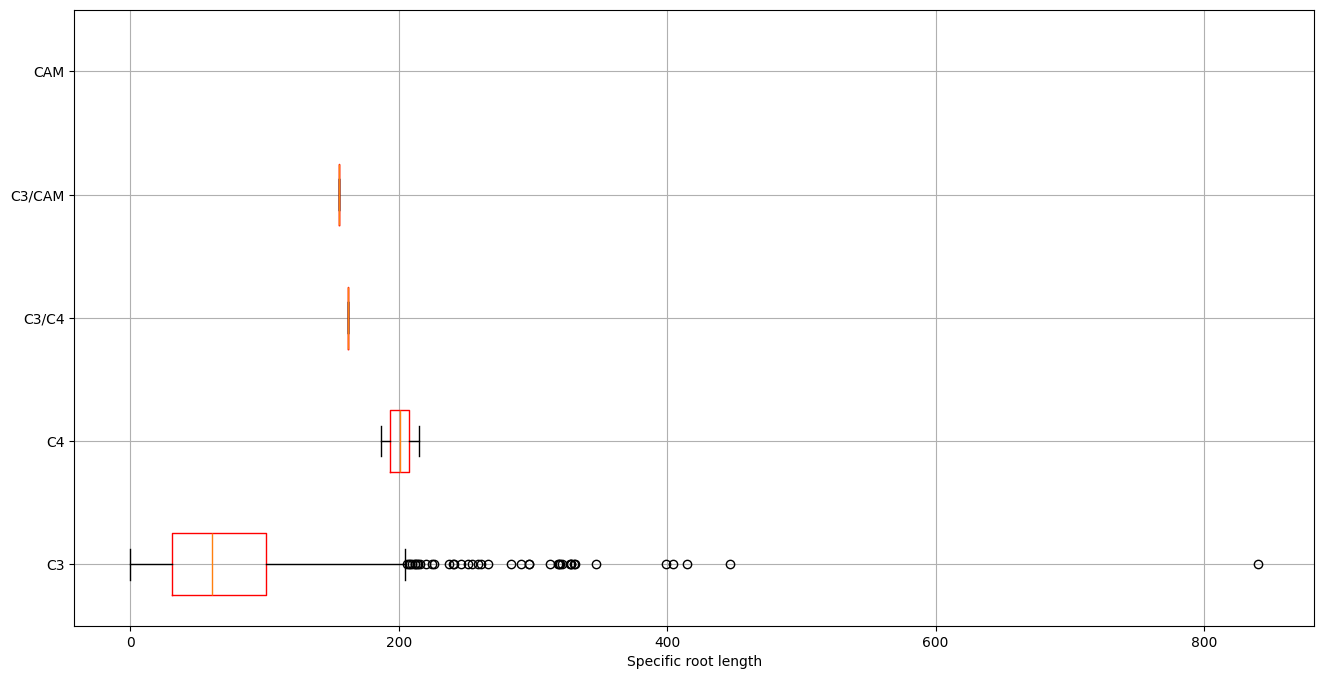

In [51]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 8)
axes.boxplot(x=[data.loc[np.logical_not(data.specific_root_length.isna()) & (data.F00043 == pway), "specific_root_length"] for pway \
                in data.F00043.unique()], orientation="horizontal", tick_labels=list(data.F00043.unique()), boxprops={"color":"red"})
axes.set_xlabel("Specific root length")
axes.grid()
plt.show()

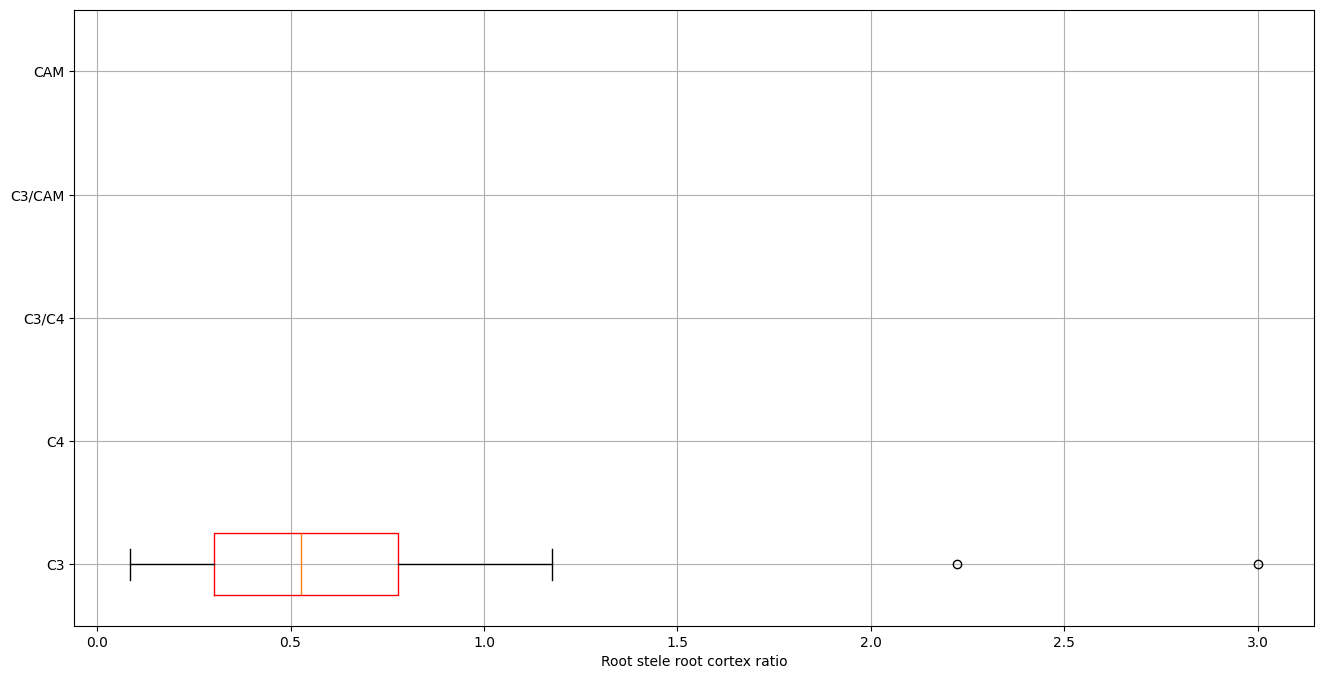

In [52]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 8)
axes.boxplot(x=[data.loc[np.logical_not(data.root_stele_root_cortex_ratio.isna()) & (data.F00043 == pway), "root_stele_root_cortex_ratio"] for pway \
                in data.F00043.unique()], orientation="horizontal", tick_labels=list(data.F00043.unique()), boxprops={"color":"red"})
axes.set_xlabel("Root stele root cortex ratio")
axes.grid()
plt.show()

In [86]:
data.dropna(subset="root_diameter").plant_taxonomy_genus_data_source.isna().mean()

np.float64(0.000983008004493751)

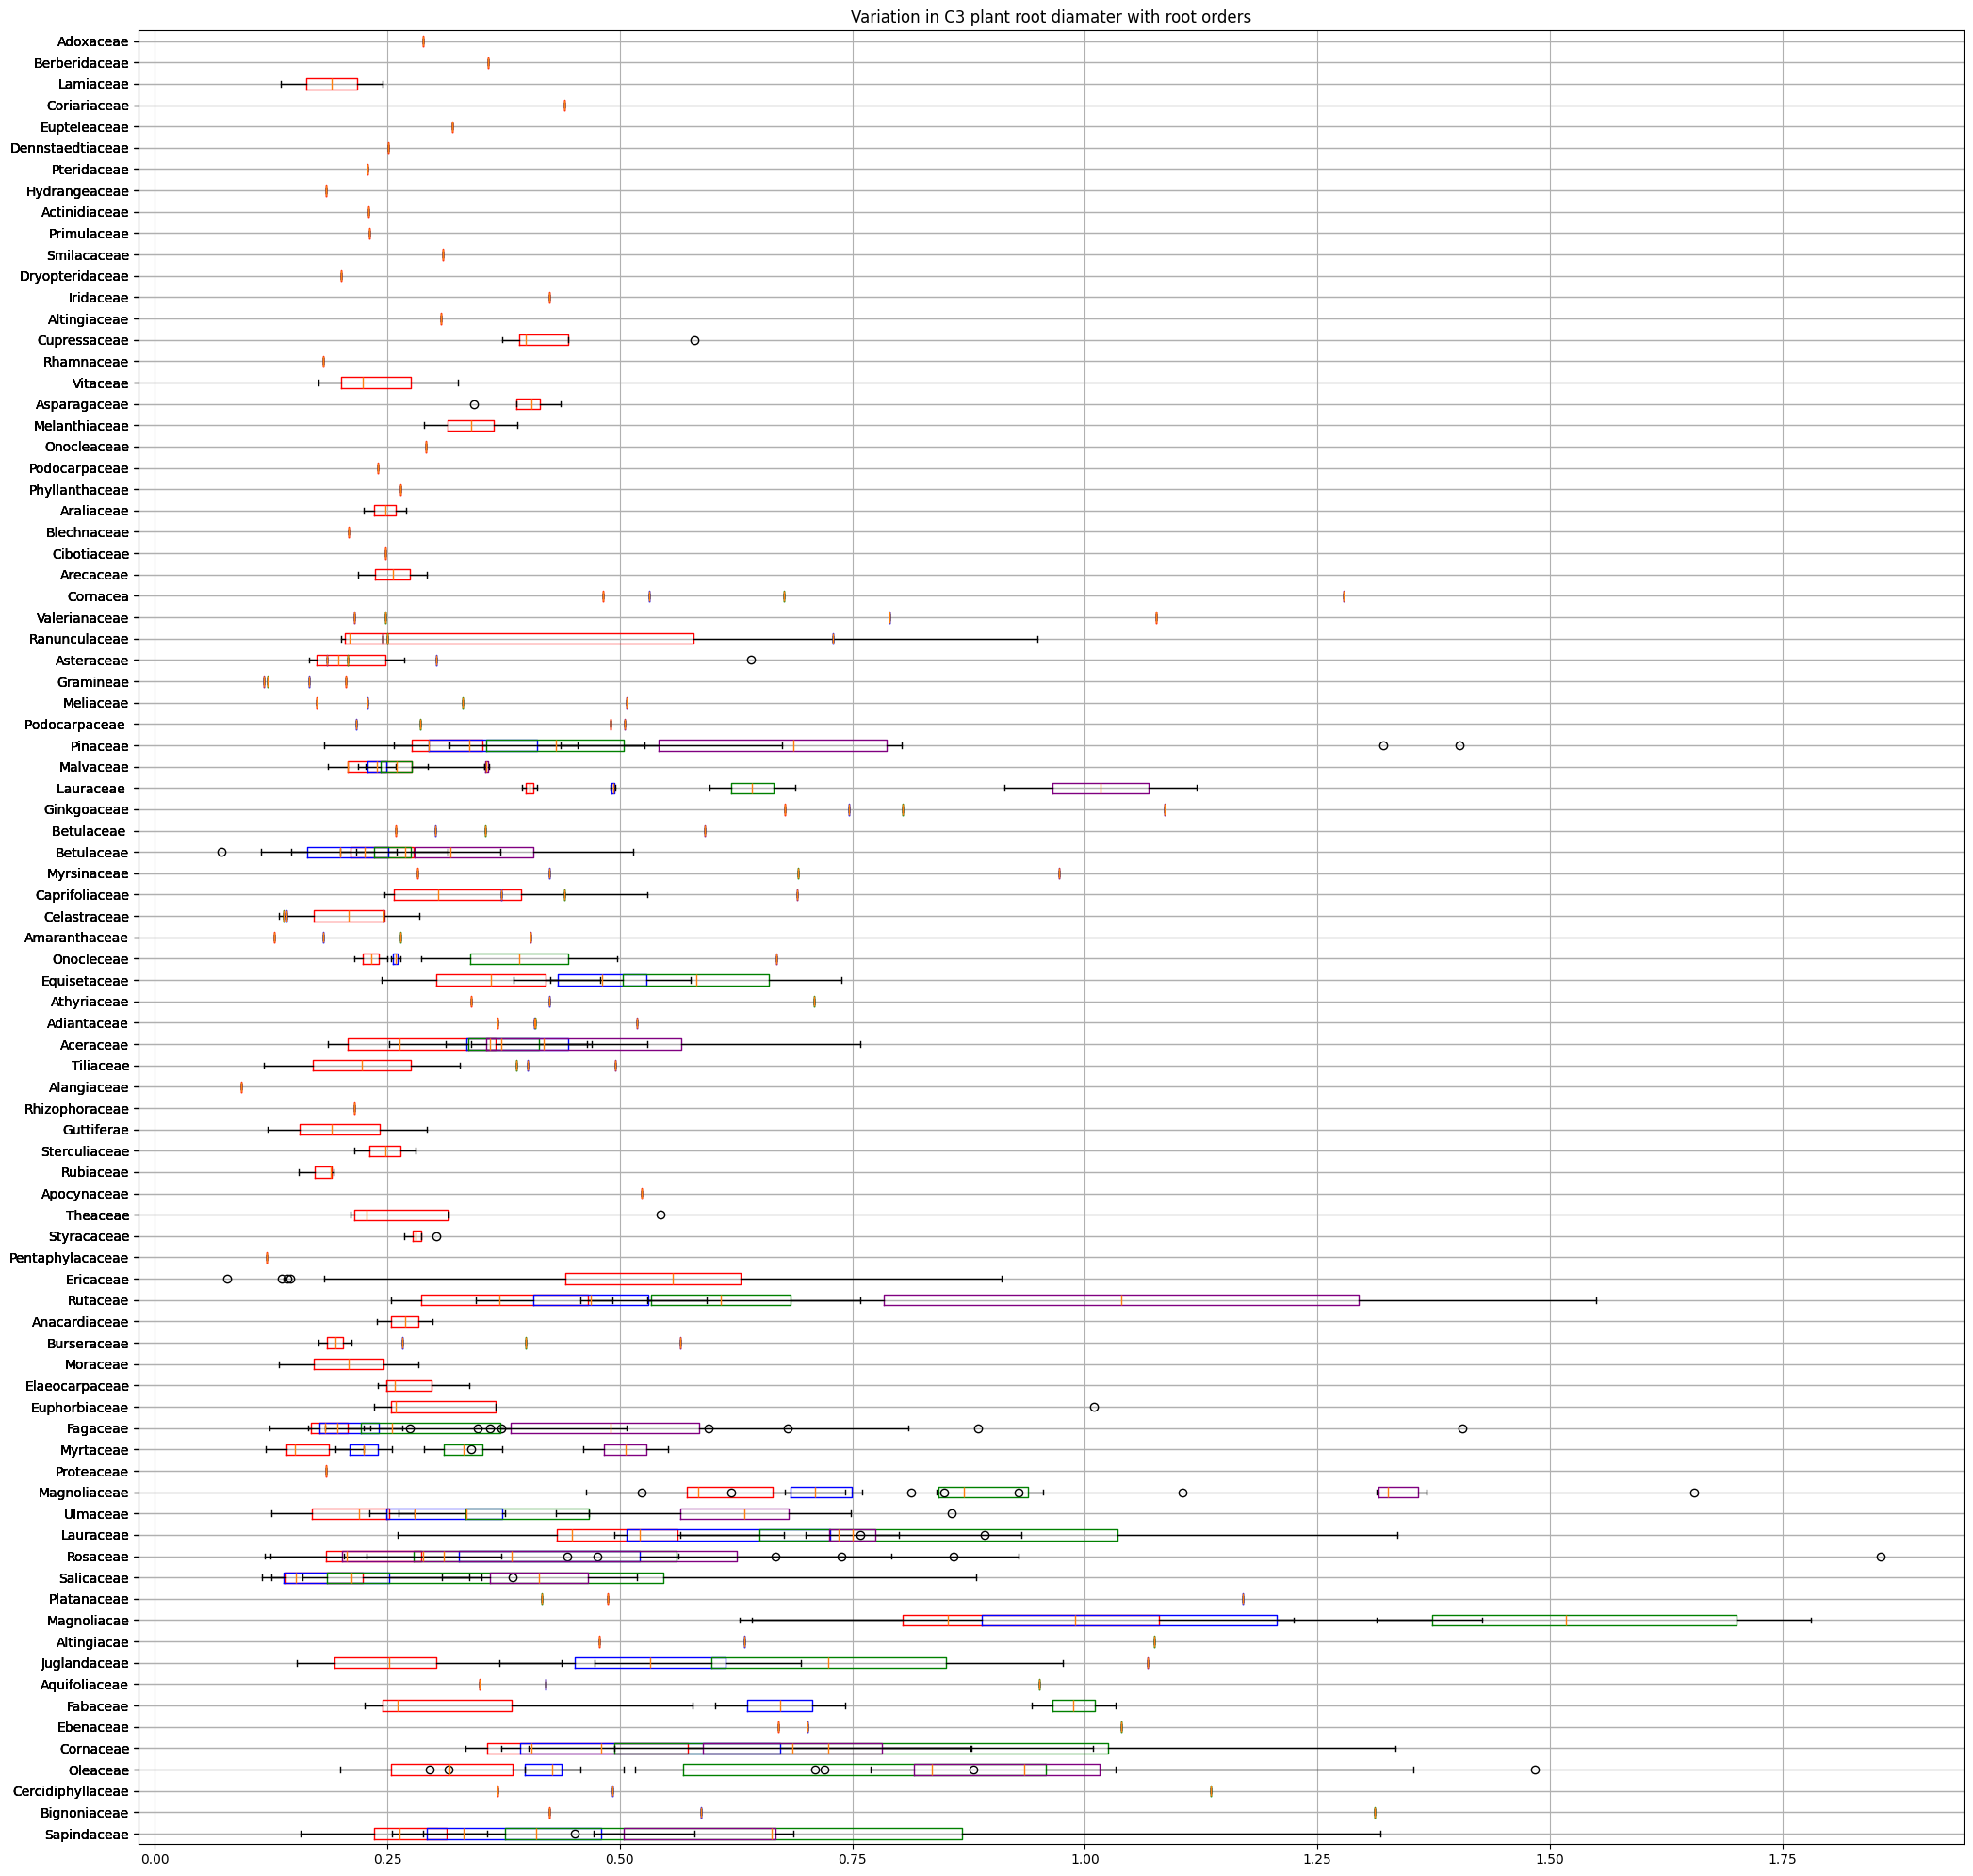

In [12]:
fig, axes = plt.subplots()
fig.set_size_inches(25, 25)

df = fred.loc[:, ["F00043", "F00679", "F00017", "F00056"]].\
                    dropna().rename(mapper= # plant_taxonomy_family_data_source, photosynthetic pathway, root diamater and root order are non negotiable!!
                                    {"F00679": "root_diameter",
                                     "F00017": "plant_taxonomy_family_data_source", 
                                     "F00056": "root_order"}, axis=1, inplace=False).query("F00043 == 'C3'")
unique_families = df.plant_taxonomy_family_data_source.unique()
axes.boxplot([df.query(f"root_order==1 & plant_taxonomy_family_data_source == \"{f}\"").root_diameter for f in unique_families],
             orientation="horizontal", tick_labels=unique_families, boxprops={"color":"red"}, label='1')

axes.boxplot([df.query(f"root_order==2 & plant_taxonomy_family_data_source == \"{f}\"").root_diameter for f in unique_families],
             orientation="horizontal", tick_labels=unique_families, boxprops={"color":"blue"}, label='2')

axes.boxplot([df.query(f"root_order==3 & plant_taxonomy_family_data_source == \"{f}\"").root_diameter for f in unique_families],
             orientation="horizontal", tick_labels=unique_families, boxprops={"color":"green"}, label='3')

axes.boxplot([df.query(f"root_order==4 & plant_taxonomy_family_data_source == \"{f}\"").root_diameter for f in unique_families],
             orientation="horizontal", tick_labels=unique_families, boxprops={"color":"purple"}, label='4')

axes.grid()
axes.set_title("Variation in C3 plant root diamater with root orders")
plt.show()

In [97]:
print((fred.F00043 == r"C4").sum(), # that's almost nothing????
(fred.F00043 == r"C3").sum())

689 36539


In [25]:
(data.F00043 == r"C4").sum(), (data.F00043 == r"C3").sum()

(np.int64(29), np.int64(6036))

In [101]:
# THERE'S NOT ENOUGH DATA IN FRED TO ANALYZE C4 PLANT ROOT DIAMATER UNFUCKINGFORTUNATELY :/
fred.loc[:, ["F00043", "F00679", "F00017", "F00056"]].query("F00043 == 'C4'").dropna(subset=["F00679", "F00056"]) 
# WHAT'S LEFT AFTER FILTERING OUT NANS IN ROOT ORDER AND ROOT DIAMATER DOESN'T HAVE FAMILY INFORMATION :(

,F00043,F00679,F00017,F00056
23589,C4,0.200000,NaN,1.0
23590,C4,0.250000,NaN,2.0
23591,C4,0.780000,NaN,3.0
23592,C4,1.260000,NaN,4.0
39977,C4,0.164000,NaN,1.0
39991,C4,0.159000,NaN,1.0
39997,C4,0.175000,NaN,1.0
40006,C4,0.154000,NaN,1.0
40010,C4,0.195000,NaN,1.0
40209,C4,0.128367,NaN,1.0


In [103]:
# F00727 - SPECIFIC ROOT LENGTH (SRL)
fred.loc[:, ["F00043", "F00727", "F00017", "F00056"]].query("F00043 == 'C4'").dropna(subset=["F00727", "F00056"]) 

,F00043,F00727,F00017,F00056
24630,C4,186.53,NaN,1.0
24631,C4,67.33,NaN,2.0
24632,C4,24.44,NaN,3.0
24634,C4,214.75,NaN,1.0
24635,C4,86.94,NaN,2.0
24636,C4,29.76,NaN,3.0


In [104]:
# F00104 - ROOT CORTEX FRACTION (RCF)
fred.loc[:, ["F00043", "F00104", "F00017", "F00056"]].query("F00043 == 'C4'").dropna(subset=["F00104", "F00056"]) 

,F00043,F00104,F00017,F00056


In [32]:
data.query("F00043==\"C4\"").groupby(["plant_taxonomy_genus_data_source", "F00043"]).count()

,,root_diameter,specific_root_length,root_cortex_thickness,root_stele_root_cortex_ratio,plant_taxonomy_family_data_source,plant_taxonomy_species_data_source,root_order
plant_taxonomy_genus_data_source,F00043,,,,,,,
Calligonum,C4,4,0,0,0,0,10,10
Cleistogenes,C4,4,6,0,0,0,10,10
Kochia,C4,2,0,0,0,0,2,2
Salsola,C4,2,0,0,0,0,2,2
Zea,C4,0,0,0,0,0,5,5


In [19]:
multi = pd.Series(index=data.plant_taxonomy_genus_data_source, data=pd.get_dummies(data.F00043).sum(axis=1).values).\
                groupby("plant_taxonomy_genus_data_source").mean()
multi[multi.values > 1] # damn!

Series([], dtype: float64)

In [36]:
# WE DO HAVE GENUS AND SPECIES LEVEL INFO FOR THE C4 PLANTS :)
data.query("F00043==\"C4\"").loc[:, ["plant_taxonomy_genus_data_source", "plant_taxonomy_species_data_source"]].\
        drop_duplicates()

,plant_taxonomy_genus_data_source,plant_taxonomy_species_data_source
23501,Calligonum,caput-medusae
24630,Cleistogenes,songorica
24634,Cleistogenes,squarrosa
25410,Zea,mays
39991,Salsola,collina
40010,Kochia,prostrata


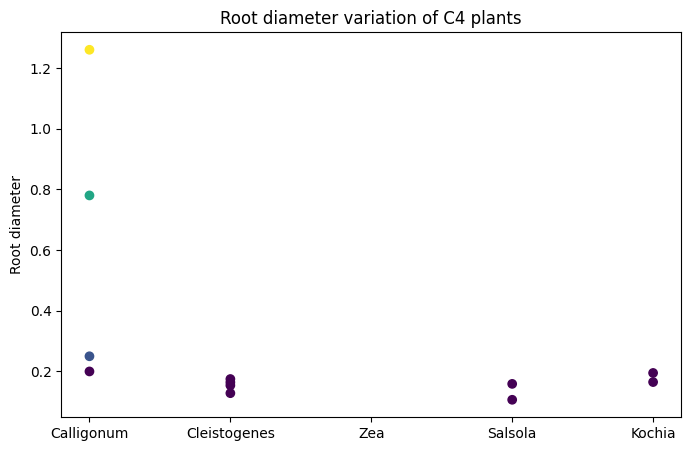

In [48]:
fig, axes = plt.subplots()
fig.set_size_inches(8, 5)
axes.scatter(
    data.query("F00043==\"C4\"").plant_taxonomy_genus_data_source, data.query("F00043==\"C4\"").root_diameter,
    c=np.square(data.query("F00043==\"C4\"").root_order+2)
)
axes.set_title("Root diameter variation of C4 plants")
axes.set_ylabel("Root diameter")
plt.show()

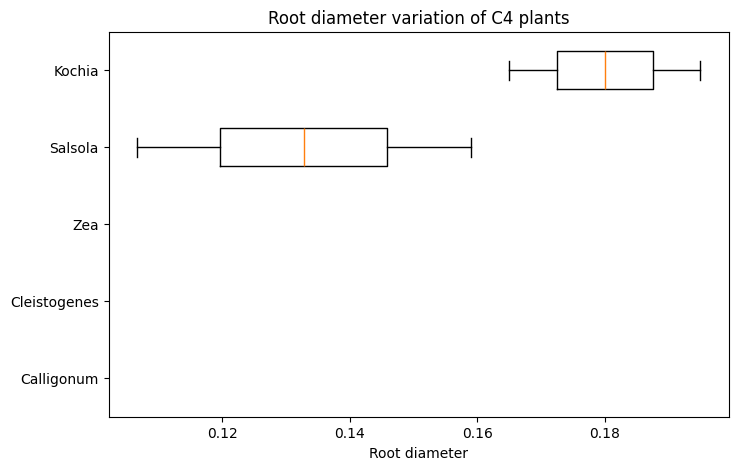

In [64]:
fig, axes = plt.subplots()
fig.set_size_inches(8, 5)
axes.boxplot(
    [data.query(f"F00043==\"C4\" & plant_taxonomy_genus_data_source==\"{g}\"").root_diameter for \
     g in data.query("F00043==\"C4\"").plant_taxonomy_genus_data_source.unique()],
    tick_labels=data.query("F00043==\"C4\"").plant_taxonomy_genus_data_source.unique(), orientation="horizontal"
)
axes.set_title("Root diameter variation of C4 plants")
axes.set_xlabel("Root diameter")
plt.show()

## ___Atriplex___
---------------

In [26]:
# Artiplex is a genus that has all C3, C4 and C3-C4 intermediate species!!!

fred.loc[fred.F00018 == "Atriplex", ["F00043", "F00018", "F00019"]].drop_duplicates()

,F00043,F00018,F00019
2917,C4,Atriplex,confertifolia
32639,C3,Atriplex,patula
33293,C4,Atriplex,tatarica
33368,C4,Atriplex,canescens
33423,C4,Atriplex,torreyi
33717,NaN,Atriplex,spinosa
34202,C4,Atriplex,halimus
34274,C4,Atriplex,nummularia
48717,C3/C4,Atriplex,cana
48718,C4,Atriplex,dimorphostegia


## ___GRooT___
------------

In [13]:
groot.loc[:, "photosyntheticPathway"].unique()

array([nan, 'C3', 'C4', 'C3/CAM', 'CAM', 'C3/C4', 'C4/CAM'], dtype=object)

In [14]:
groot.loc[:, "photosyntheticPathway"].isna().mean()

np.float64(0.15714135630614068)

In [15]:
groot.traitName[groot.traitName.str.contains("diameter")].unique()

array(['Mean_Root_diameter', 'Root_stele_diameter',
       'Root_vessel_diameter'], dtype=object)

In [16]:
groot.loc[groot.traitName == "Mean_Root_diameter", ["photosyntheticPathway", # "traitName",
                                                    "traitValue"]].dropna(subset="photosyntheticPathway")

,photosyntheticPathway,traitValue
917,C3,0.5500
921,C3,0.5500
925,C3,0.5300
933,C3,0.6200
937,C3,0.7400
...,...,...
106801,C3,0.1686
106808,C3,0.0649
106815,C3,0.4627
106822,C3,0.2897


In [17]:
groot.photosyntheticPathway.unique()

array([nan, 'C3', 'C4', 'C3/CAM', 'CAM', 'C3/C4', 'C4/CAM'], dtype=object)

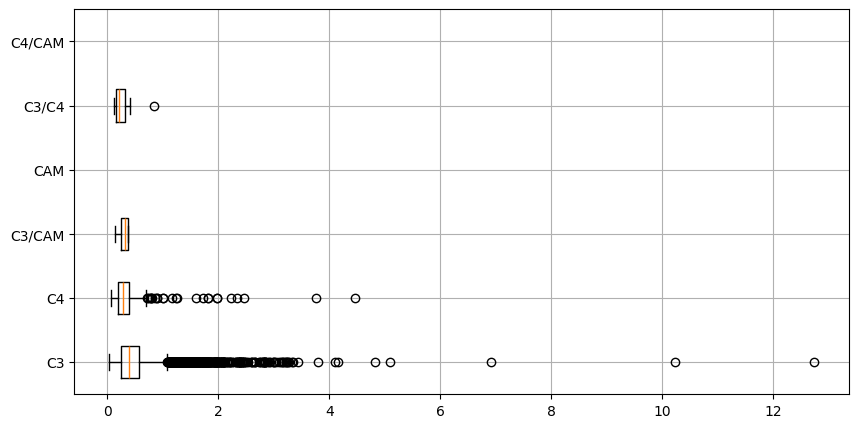

In [18]:
fig, axes = plt.subplots()
fig.set_size_inches(10, 5)
axes.boxplot([groot.loc[(groot.traitName == "Mean_Root_diameter") & (groot.photosyntheticPathway == pway), "traitValue"] for \
              pway in ('C3', 'C4', 'C3/CAM', 'CAM', 'C3/C4', 'C4/CAM')], orientation="horizontal",
             tick_labels=('C3', 'C4', 'C3/CAM', 'CAM', 'C3/C4', 'C4/CAM'))
axes.grid()
plt.show()